Amazon Fine Food Reviews Sentiment Analysis.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

import nltk

In [2]:
df = pd.read_csv("Reviews.csv")

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.head(500)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
495,496,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


In [5]:
df["Text"].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [6]:
df.shape

(568454, 10)

In [7]:
df = df[df.HelpfulnessNumerator<=df.HelpfulnessDenominator]
# The attribute HelpfulnessNummerator gives the number of positive reviews and 
# The HelpfulnessDenominator gives the total number of reviews.
# By common-sense HfN<=HfD.
# Fortunately there are only 2 such data rows.


In [8]:
df.shape
#50k rows is still a lot of data to clean.

(568452, 10)

In [9]:
df = df.drop_duplicates(subset={"UserId" , "ProfileName", "Time" , "Text"} , keep = 'first' , inplace = False)
df.shape
# Here the data is cleaned by dropping all the duplicate rows and we see a significant reduction in the data.

(393931, 10)

<AxesSubplot: title={'center': 'Count of the Reviews according to the score and after data cleaning'}>

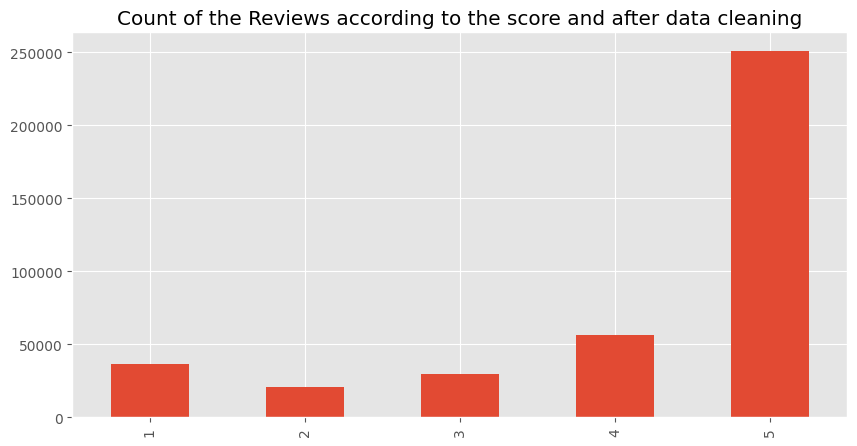

In [10]:
df["Score"].value_counts().sort_index().plot(kind = "bar" , title = "Count of the Reviews according to the score and after data cleaning" , figsize = (10,5))

<AxesSubplot: title={'center': 'Reviews according to the score and after data cleaning'}, ylabel='Score'>

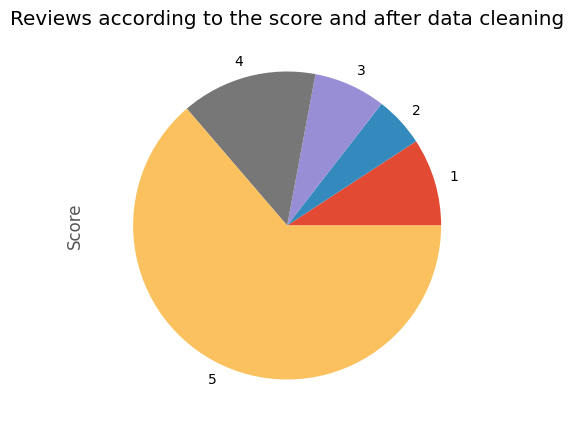

In [11]:
# Observation : The dataset is biased towards the positive reviews.
df["Score"].value_counts().sort_index().plot(kind = "pie" , title = "Reviews according to the score and after data cleaning" , figsize = (10,5))

In [12]:
sample = df["Text"][26]
# I am using a sample. This is for testing purposes and will be used throught the code.
# The number 26 is completely random
print(sample)

The candy is just red , No flavor . Just  plan and chewy .  I would never buy them again


In [13]:
# Observation : The above sentence is definitly a negative review.  
# TWIZZLERS Twists, Strawberry Flavored Licorice Candy, 16 Ounce Bag (Pack of 6)
# Don't waste money on candy , buy RTX 4090 instead. 

In [14]:
nltk.word_tokenize(sample)

['The',
 'candy',
 'is',
 'just',
 'red',
 ',',
 'No',
 'flavor',
 '.',
 'Just',
 'plan',
 'and',
 'chewy',
 '.',
 'I',
 'would',
 'never',
 'buy',
 'them',
 'again']

In [15]:
# The tokenizer will convert the words into tokens. (Like yeah look at the name duh...)
# This can be helpful in BOW technique.

In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

#tqdm is used as a progress bar (this is optional... but dude.. use it to estimate time and chill)
# IF YOU GET AN ERROR WHILE IMPORTING OR USING NLTK MODULES THEN RUN : nltk.download("all")
# If that is still not working , only god can save you.
sia = SentimentIntensityAnalyzer()

In [17]:
sia.polarity_scores("This relationship is over")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [18]:
# How TF is the neutral... but okay...atleast it's over...

In [19]:
sia.polarity_scores("Messi won the world cup")

{'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'compound': 0.5719}

In [20]:
# observe the difference

In [21]:
sia.polarity_scores("Messi won the worldcup and I am so happy")

{'neg': 0.0, 'neu': 0.415, 'pos': 0.585, 'compound': 0.857}

In [22]:
sia.polarity_scores(sample)

{'neg': 0.128, 'neu': 0.872, 'pos': 0.0, 'compound': -0.296}

In [23]:
print(sample)
# pro tip : don't buy this candy , listen to this review

The candy is just red , No flavor . Just  plan and chewy .  I would never buy them again


In [24]:
# Observe that statements like "No flavor" , "Just plain and chewy" are not exactly negative for a ML model. 

In [25]:
res = {}
for i,row in tqdm(df.iterrows(),total = len(df)):
    text = row["Text"]
    myid = row["Id"]
    res[myid] = sia.polarity_scores(text)
    if i == len(df):
        break

  0%|          | 0/393931 [00:00<?, ?it/s]

In [26]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [27]:
# Time complexity analysis : 

# For Iterating over the df of size "n" will take O(N)
# For finding the polarity_scores using nltk sentiment analysis will take approx O(M) for M reviews.
# O(1) to add in the dictionary , assuming hash function is efficient.

# Therefore Total time complexity = O(N*M) or O(N*N) = O(N^2)

# for 393931 reviews , it will take O(393931 * 393931), which is not efficient.
# That's why we use DSA....Optimize this now... Can't optimize? Then do 500 problems on Leetcode and crack Google.

In [28]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns = {'index' : 'Id'})
final = vaders.merge(df, on = 'Id' , how = 'left')

In [29]:
final.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


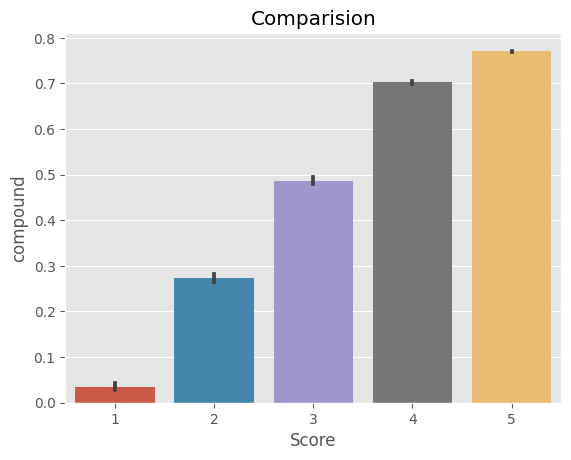

In [30]:
plot1 = sns.barplot(data = final, x= "Score" , y = 'compound')
plot1.set_title("Comparision")
plt.show()

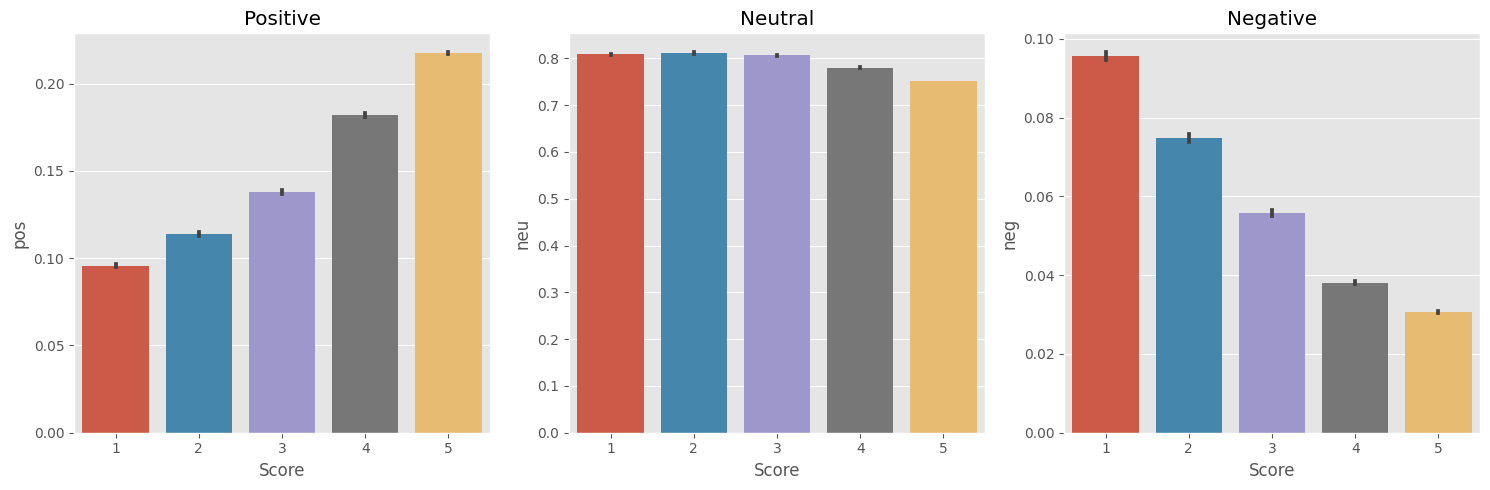

In [31]:
fig , plot1 = plt.subplots(1,3,figsize = (15,5))
sns.barplot(data = final , x= "Score" , y = 'pos' , ax = plot1[0])
sns.barplot(data = final , x= "Score" , y = 'neu' , ax = plot1[1])
sns.barplot(data = final , x= "Score" , y = 'neg' ,ax = plot1[2])
plot1[0].set_title("Positive")
plot1[1].set_title("Neutral")
plot1[2].set_title("Negative")
plt.tight_layout()
plt.show()

In [32]:
# The more the score the more the positive the review is observe plot POSITIVE
# NEUTRAL plot has a flattened graph
# The more the score the less the neg value

In [34]:
# I used a simple VADER technique which used BOW internal implementation.
# This only cares about the words which are vectors and comparing them... that is why the time complexity is high.
# There are better algorithms out there using transformers which consider the semantic meaning as well.

In [35]:
## ADVANTAGES ## 
# This implementation is harder to generate , but this generates accurate outputs.
# Easy to implement
# Easy to analyse.
 
## DISADVANTAGES ##
# O(N^2)  very time taking.
# N is directly proportional to your sins... the bad the person you are the more this model hesitates to work.
# Does not care about the semantic meaning... cannot understand sarcasm... btw what is the colour of Ronaldo's world-cup ?



In [36]:
#POV : This is my first proper project related to ML. Will improve this in the future

In [60]:
def Analysis(review):
    check = sia.polarity_scores(review)
    pos = round(check["pos"] , 1)
    neg = round(check["neg"] , 1)
    if(pos == neg):
        return "Neutral"
    if(check["pos"] > check["neg"] and check["pos"] > check["compound"] ):
        return "Positive"
    elif(check["neg"]> check["pos"] and check["neg"] > check["compound"]):
        return "Negative"
    else:
        return "Neutral"



review = input()
print(Analysis(review))

Ronaldo is better than Messi
Neutral


In [46]:
review = input()
print(Analysis(review))


I am Happy
Positive


In [47]:
review = input()
print(Analysis(review))


I am sad
Negative


In [48]:
review = input()
print(Analysis(review))

This food tastes very bad but is healthy
Positive


In [49]:
review = input()
print(Analysis(review))


This car looks too good but cannot drift
Neutral


In [50]:
review = input()
print(Analysis(review))


This car look good but is of no use
Negative


In [61]:
review = input()
print(Analysis(review))

I had the worst dining experience ever at this restaurant. The food was absolutely terrible; I couldn't even take a second bite. The service was slow, and the staff seemed indifferent. However, the ambiance was lovely, and I enjoyed the music playing in the background. It's a shame because the atmosphere was great, but I would never eat here again
Neutral


In [62]:
# This model fails for complex mixed emotions and sarcasm.